Link to Medium blog post: https://towardsdatascience.com/a-quick-way-to-reformat-columns-in-a-pandas-dataframe-80d0b70de026

# A Quick Way to Reformat Columns in a Pandas DataFrame

In [1]:
import pandas as pd

In this piece, we’ll be looking at how you can use one the df.melt function to combine the values of many columns into one.

This means you’re changing a DataFrame from a “wide” format to a “long” format. This is helpful when you have many columns that technically have the same type of values.

For example, say you owned a coffee shop and started with two types of drinks. To keep track of the ingredients for each drink, you made a table that looked like this:

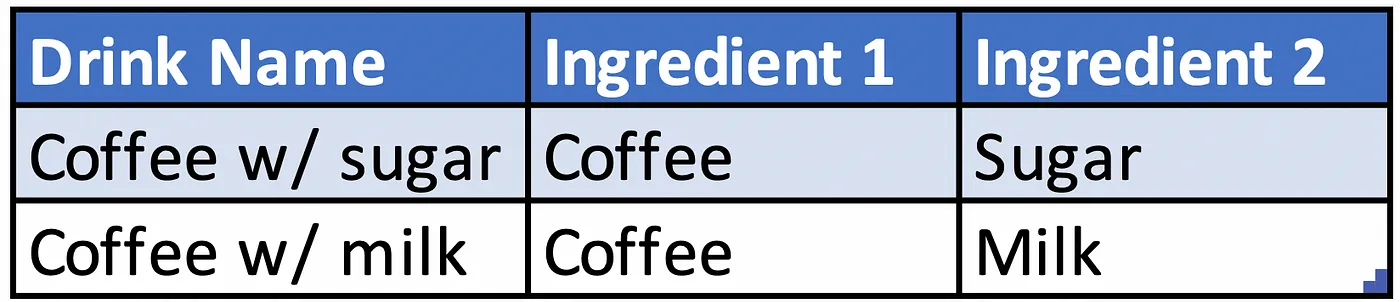

This might work for now, but what if you wanted to include a drink with three ingredients? You’d have to create another column like “Ingredient 3”, but what if you wanted a drink with 4, 5 or even 10 ingredients? Making new columns every time you need to enter more data isn’t the most elegant of solutions.

Instead, it would be great if you had a table like this:

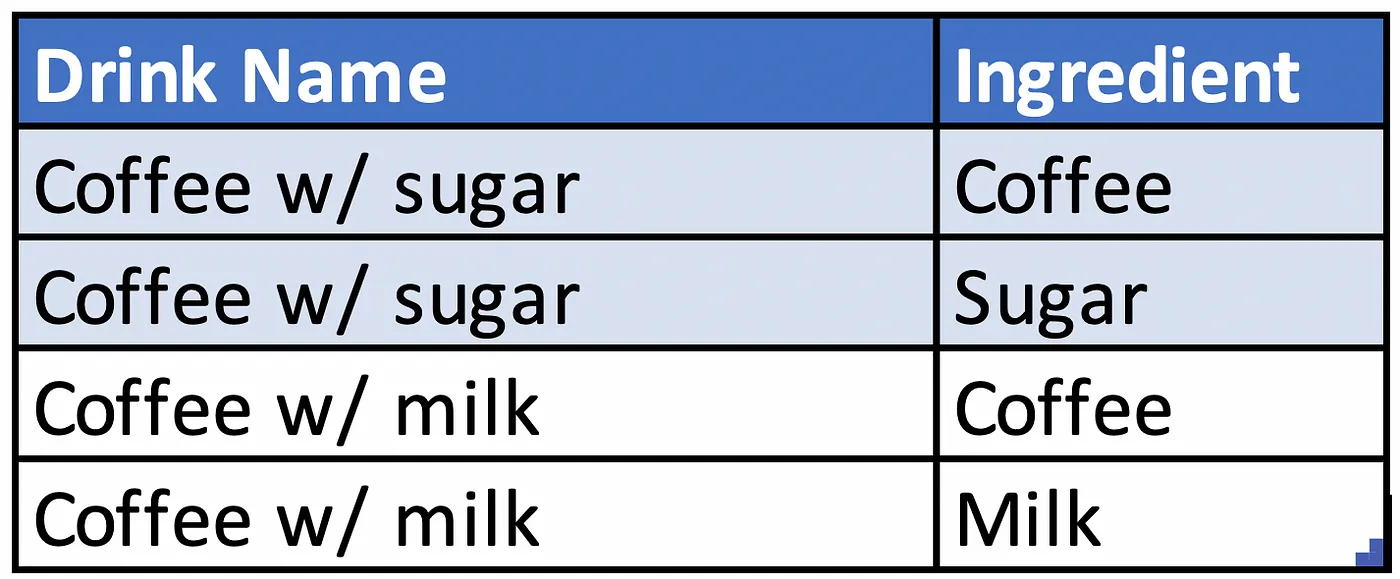

Now, your table is a lot more flexible. Your drinks can have as many or as little ingredients as you want, and you don’t need to alter the table structure for different kinds of data entries.

Let’s take a look at how to do this with df.melt on a more complicated example.

In [19]:
# pre-processing data
df = pd.read_csv('vgsales.csv').dropna()
df['Year'] = df['Year'].astype(int)
df = df.loc[df['Publisher']=='Nintendo']
df = df.loc[(df['Platform']=='Wii') | (df['Platform']=='WiiU')]
df = df[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df = df.groupby('Platform').sum().reset_index()

df

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,182.02,123.01,50.92,34.40,390.34
1,WiiU,26.09,16.05,11.24,4.55,57.90


## How to melt a DataFrame

You can see in the table above we have several aggregated sales values for different regions. While this is easy to read, it’s not the best table structure possible.

Our goal is to put all the sales values into one column, and all the sales regions into another column.

Before we do that, let’s briefly introduce the df.melt function. The function has four key parameters:

- id_vars -> the columns to use to identify each row (similar to an index column) — pass a list;

- value_vars -> the columns in your table that you want to compress (or unpivot). You can leave this blank if you want all columns besides id_vars to be compressed — pass a list;

- var_name -> the name for your new “category” column, of which the values are the column names you passed to “value_vars” — pass a scalar value;

- value_name -> the name for your new “values” column — pass a scalar value.
For our table, we need to identify each row with the “Platform” column, so we’ll pass that into id_vars. Our value columns will be all the sales columns except for “Global Sales”, because that’s not technically a region category. We’ll pass a list of the column names into value_vars to implement this.

To improve readability, we’ll also name our two new columns “Sales Region” and “Sales (millions)” by including them in the var_name and value_name parameters respectively.

The final code looks like this:



In [20]:
df = df.melt(id_vars=['Platform'], 
value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], var_name='Sales Region', 
value_name='Sales (millions)')

In [21]:
df

,Platform,Sales Region,Sales (millions)
0,Wii,NA_Sales,182.02
1,WiiU,NA_Sales,26.09
2,Wii,EU_Sales,123.01
3,WiiU,EU_Sales,16.05
4,Wii,JP_Sales,50.92
5,WiiU,JP_Sales,11.24
6,Wii,Other_Sales,34.40
7,WiiU,Other_Sales,4.55


And there it is! We’ve moved all the old columns names into a new category column and combined their values into a single values column.

For better presentation, we can also sort the table with one additional line of code:

In [24]:
df = df.sort_values(['Platform','Sales (millions)'], ascending=False)

df

,Platform,Sales Region,Sales (millions)
1,WiiU,NA_Sales,26.09
3,WiiU,EU_Sales,16.05
5,WiiU,JP_Sales,11.24
7,WiiU,Other_Sales,4.55
0,Wii,NA_Sales,182.02
2,Wii,EU_Sales,123.01
4,Wii,JP_Sales,50.92
6,Wii,Other_Sales,34.40
